<a href="https://colab.research.google.com/github/ZtyxZ/Computer-Vision-with-Deep-Learning/blob/main/Lab1_Color_and_Convolutions_CVDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/kev1092/Lab1-CV-course-HH

Cloning into 'Lab1-CV-course-HH'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 84 (delta 33), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (84/84), 15.56 MiB | 10.58 MiB/s, done.
Resolving deltas: 100% (33/33), done.


In [2]:
# Credits and thanks to Joseph Redmon from washington university

import matplotlib.pyplot as plt
import numpy as np
import cv2

# Libraries and images

We encode images as 3-dimensional tensors. In each image, we have spatial information, represented as row and column coordinates, and channel information that encodes the color information.

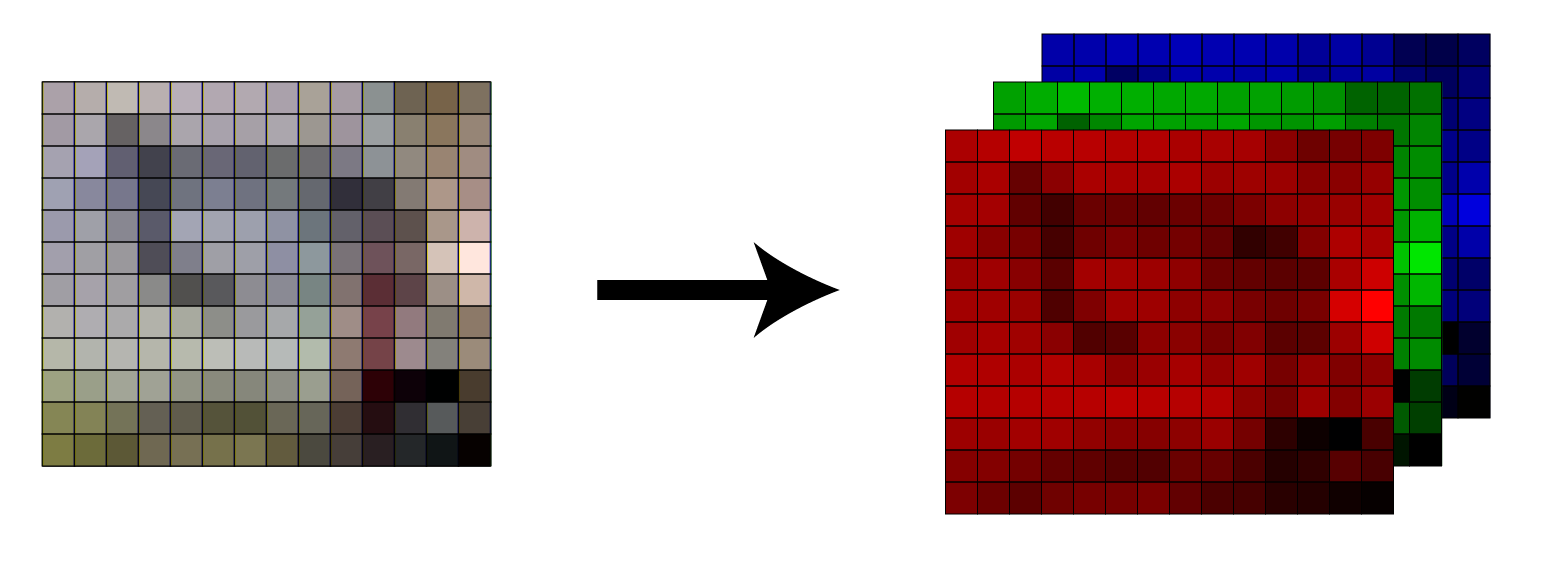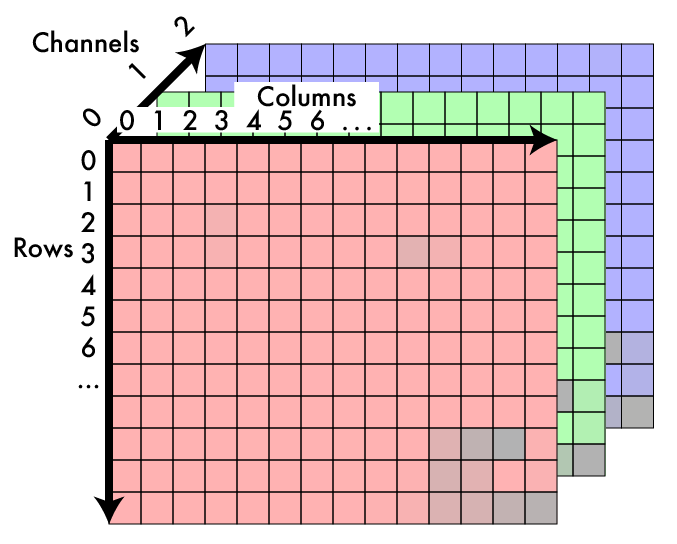

Since images are encoded as arrays/matrices/tensors, the coordinate system usually starts in the top-left corner.

There are several color systems, RGB, BGR, HSV, CMYK... depending on the field and purpose of the image, a specific one may be typically used. However, the most common system is RGB, with each image being an array of unsigned 8-bits integers. So each pixel is formed by three-channel information, representing the intensity of red, green, and blue, respectively, ranging from 0 to 255. However, each library has its own particularities. See the example below




Let's import our first image. First, open the file on your computer and check how it looks like

Let's import it with the OpenCV library. OpenCV is one of the most common and oldest libraries specializing in computer vision projects.


In [3]:
img = cv2.imread("Lab1-CV-course-HH/flowers.png")

perfect! let's check the image out! Let's use matplotlib for that

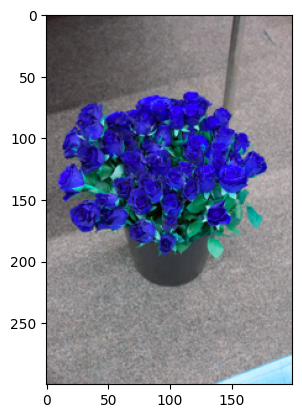

In [4]:
plt.imshow(img)

Hmm... something seems off... the image looks much bluer than it should. Let's try using a function from the OpenCV library

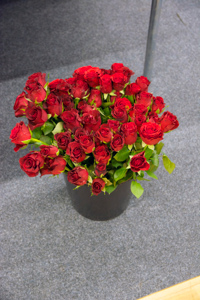

In [5]:
# We have to use this function because of the jupyter environment and the way that OpenCV imshow works.
# The original function would be cv2.imshow
from google.colab.patches import cv2_imshow
cv2_imshow(img)

Now it looks good! But why is that?

Well, even though, as we said earlier, the custom is to use RGB and uint8 type for images, OpenCV works on a Blue, Green, Red(BGR) system while matplotlib was expecting an RGB image. The reason for this seems to be backward-compatibility and historical reasons, from a time when BGR was popular among camera manufacturers and software providers.

Furthermore, let's check the following case.

In [6]:
img = plt.imread("Lab1-CV-course-HH/flowers.png")

Now let's check the actual image pixel values

In [7]:
print("maximum pixel value in the image: {}".format(np.max(img)))
print("minimum pixel value in the image: {}".format(np.min(img)))

maximum pixel value in the image: 1.0
minimum pixel value in the image: 0.0


It seems that the pixel values are float and in the range 0-1, but why is that? Well... matplotlib import "png" images like that!
So, what is the moral of this story? Be careful! Even though the normal case is that images are in RGB (or grayscale) format and with pixel values in the range [0,255], each library and framework can have their particularities even for simple things such as reading/importing images! This can be a problem when using functions from different libraries

# Color

Humans do not see colors equally. The following image show the human eye's sensitivity to different colors
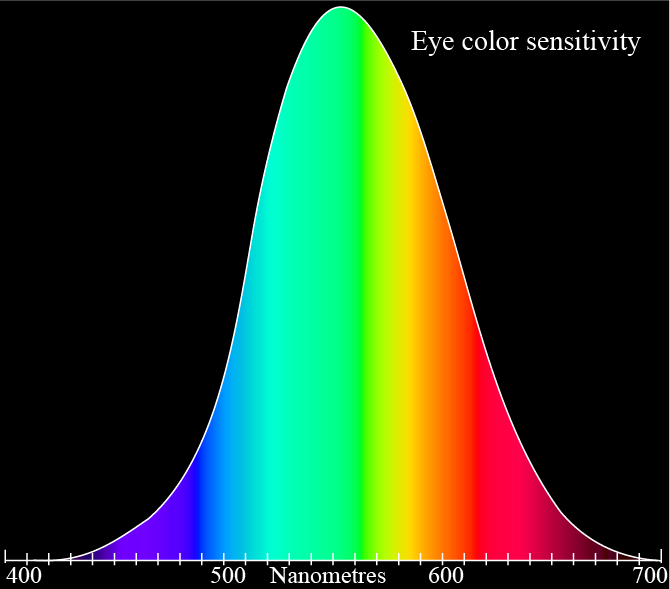

We can see that we are much more sensitive to shades of green than purple or dark red. Let's see how this affects some CV applications, for example, transforming color images to black and white.

Intuitively, if we would like to transform an RGB image into a gray one, we would try to do the average value of the RGB channels per pixel to create a gray one.

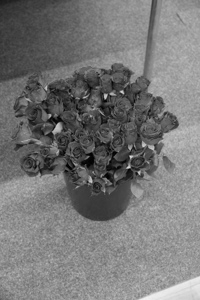

In [8]:
# TO DO: take the average pixel value of our image and display it, for example use the OpenCV library

img = cv2.imread("Lab1-CV-course-HH/flowers.png")

# take the average pixel value (you can use whatever library you want or just do normal python idexing) OBS! remember that the image format is (rows,columns,channels)
img2 = np.mean(img, axis=2)
cv2_imshow(img2)


Well... that seems a bit off, execute the following code to see how it should look like

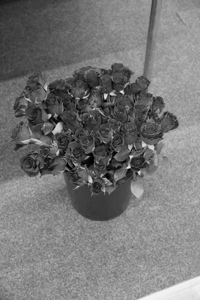

In [9]:
cv2_imshow(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))

Now it looks better, but why?

As we saw earlier in the figure about color sensitivity, we do not perceive all colors in the same way. So instead of calculating the average pixel value, we will do a weighted sum. Video engineers use a calculation called luma to find an approximation of perceptual intensity when encoding video signals. We'll use that to convert our image to grayscale. It operates directly on the gamma compressed sRGB values that we already have! We simply perform a weighted sum:

Y' = 0.299 R' + 0.587 G' + 0.114 B'

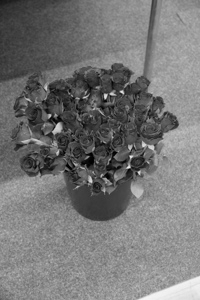

In [10]:
# TO DO: use the weighted sum from above to calculate your gray image


img2 = img[:, :, 2] * 0.299 + img[:, :, 1] * 0.587 + img[:, :, 0] * 0.114

# Now let's try again!

cv2_imshow(img2)


Now it looks much better!

Now let's talk about other color spaces, for example, HSV. HSV stands for Hue, Saturation, Value. Hue can be thought of as the base color of a pixel. Saturation is the intensity of the color compared to white (the least saturated color). The Value is the perception of the brightness of a pixel compared to black. You can try out this [demo](https://math.hws.edu/graphicsbook/demos/c2/rgb-hsv.html) to better understand the differences between these two colorspaces. For a geometric interpretation of this transformation:

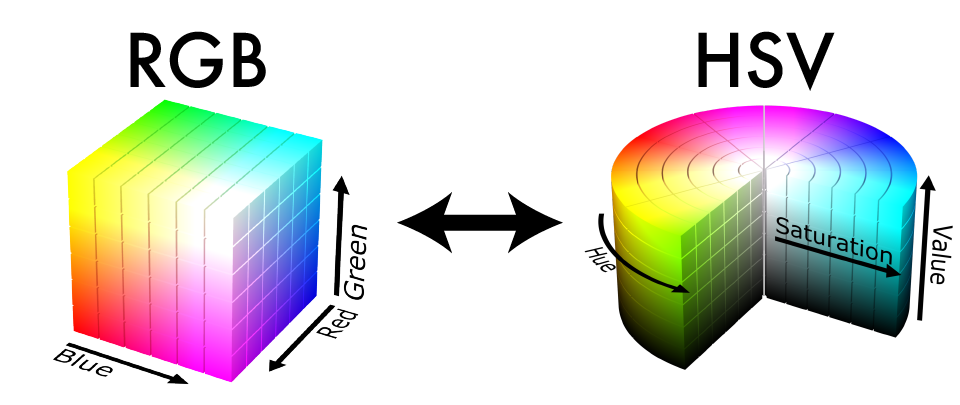

We can use these other representations to, for example, navigate through the colors/filter them/segment them more easily than in RGB.

For example, let's see what the Hue value for red is



In [11]:
# let's get the reference for pure red

red_rgb = np.uint8([[[255,0,0 ]]]) #pure red in an RGB
red_hsv = cv2.cvtColor(red_rgb,cv2.COLOR_RGB2HSV)

# let's see its value in HSV!

print("value for pure red color in HSV format: {}".format(red_hsv))

value for pure red color in HSV format: [[[  0 255 255]]]


We can see the actual color range in the Hue value in the following image. We can then select the range of color we want to segment out. Let's say we want to segment out the red content/roses in the image. We can do that as following




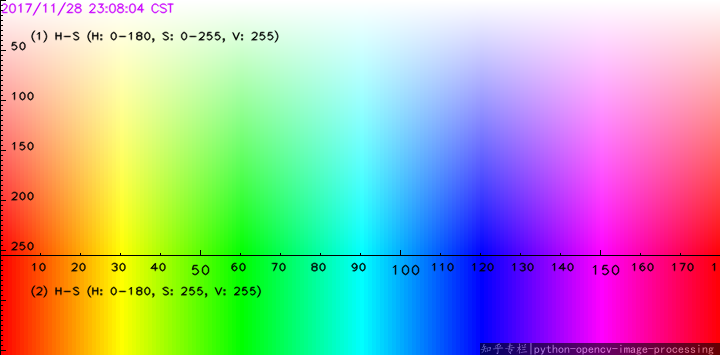

credtis:https://cvexplained.wordpress.com/2020/04/28/color-detection-hsv/

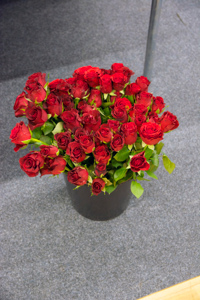

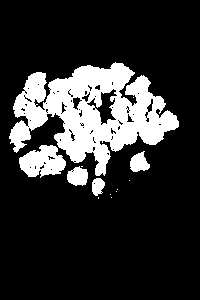

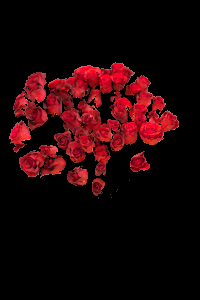

In [12]:

# We first transform our image to HSV

img3 = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

# We then get our boundary region based on the Hue image from before
# We see that red should be in the range (0-10) and (170-180)

# lower boundary RED color range values; Hue (0 - 10)
lower1 = np.array([0, 50, 50])
upper1 = np.array([10, 255, 255])

# upper boundary RED color range values; Hue (160 - 180)
lower2 = np.array([169,50,50])
upper2 = np.array([179,255,255])

# notice in the code above the values for saturation and brightness
# we have to still set some lower and upper boundary for these based on how dark and intense the color of our images are
# these values will affect the noise from dark regions/colors and of course the accuracy of our filter

# we create a mask representing the pixel that falls in our especified range
lower_mask = cv2.inRange(img3, lower1, upper1)
upper_mask = cv2.inRange(img3, lower2, upper2)

# we combine the mask from both regions to create a unique mask
# notice that we have to do this because of the "cut" for the red color in HSV
full_mask = lower_mask + upper_mask;

# Here we filter the pixels in the image with our mask
img3 = cv2.bitwise_and(img3, img3, mask=full_mask)

# we show back our images
cv2_imshow(img)
cv2_imshow(full_mask)
img3 = cv2.cvtColor(img3,cv2.COLOR_HSV2BGR)
cv2_imshow(img3)


Done! We can see that even if not perfect, we have effectively segmented the red regions in the image! Furthermore, we can see here, how this can potentially be used for object detection in images.

# Image Filtering

One of the most common and powerful operations that we can do with an image is to use a filter on it. In this lab, we will be using a Gaussian filter to blur an image (low-pass filter), extract high-frequency components (high-pass filter), and how use them to enhance contrast!

So, how is the filtering process? Applying a filter to an image is doing a 2D convolution operation between an image and a filter. We know what an image is and how it is represented in our environment, basically an array/matrix where each pixel is a cell in the 3D array. But what is a filter, and how is it represented? A filter is nothing else than a (usually) smaller matrix encoding the linear transformation that we want to apply to the image.

So, we have two matrices of different sizes. How do we apply this filter? What is a 2D convolution? Well, what we do is place our filter at the very first pixel of the image (remember that since it is an array, we consider the first pixel the top left one), do a scalar product between the filter and the area of the same size of our filter, around said pixel. We will store that value in our output array at the same location that we are in. We repeat this operation for every pixel in the image, doing a sweep over every row in the image.

Notice that technically, this is not a convolution since, in a convolution, we need to flip our filter. In this case, we are doing 2D cross-correlation, but some people call it convolution, especially in the context of Deep Learning. In the end, this flip operation is just a trivial step.

For a step-by-step, 2D convolution example, watch the gif below. In this case, the filter used is a sharpening filter different from the way we are going to do it later



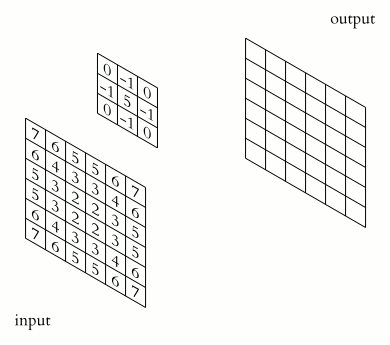

Credits: Michael Plotke / CC BY-SA (https://creativecommons.org/licenses/by-sa/3.0)

Notice what happens at the border. When we center our filter on the border pixels, there is no information beyond the image limits, so we cannot do a scalar product! This issue and how to go around it is what we call padding, and there are several ways to deal with this problem, from just ignoring the pixels where this happens (usually referred to as valid padding) to filling this void region in some ways. Please take a look at the image below for some examples

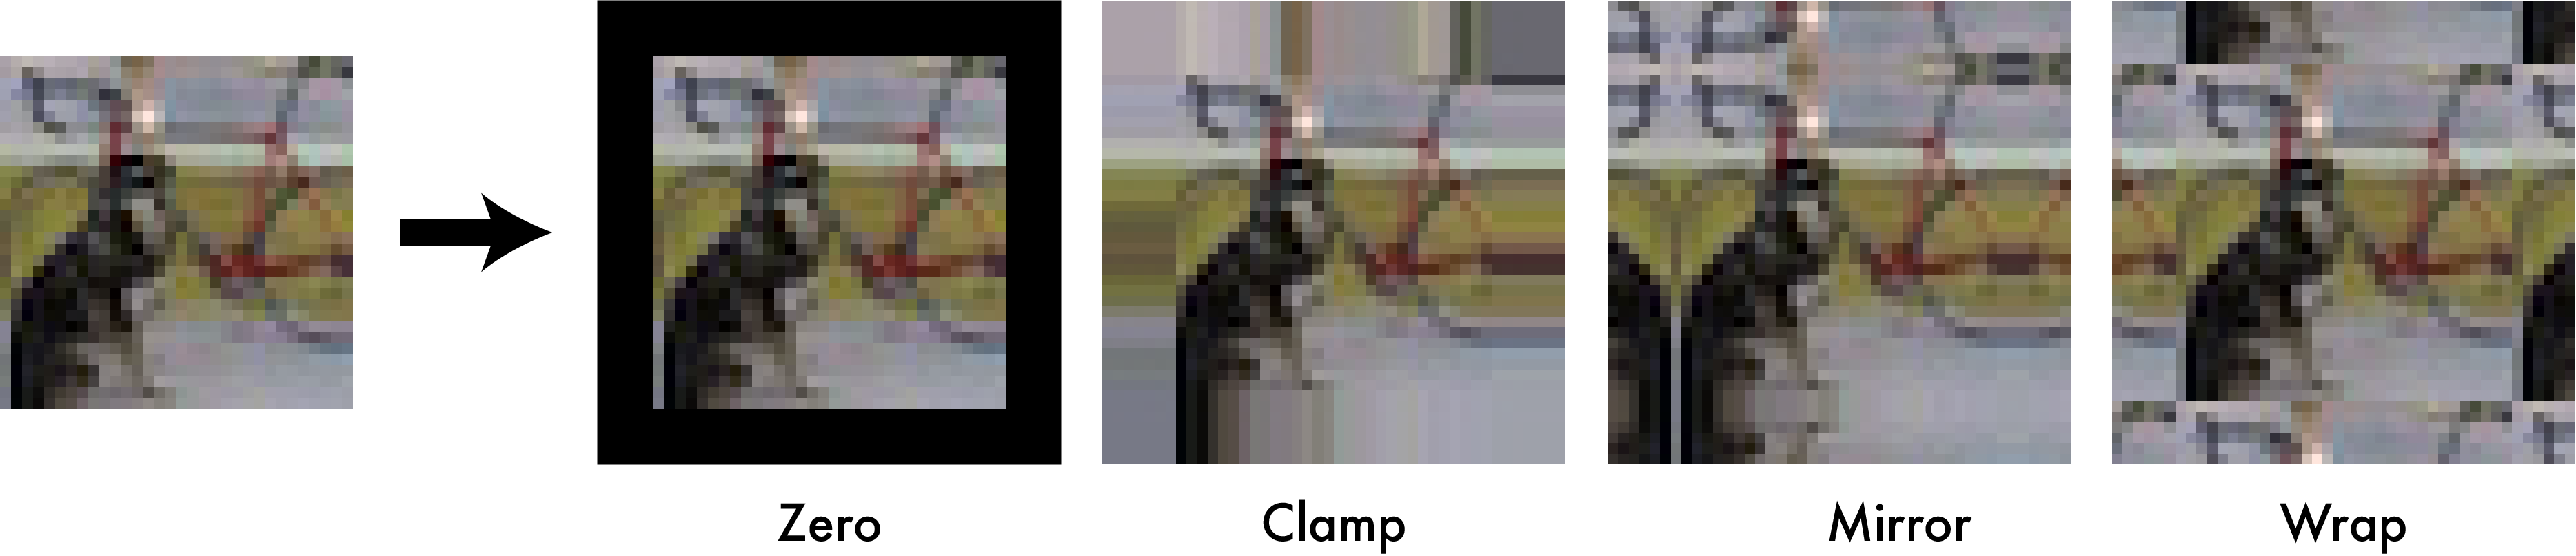


Okay, so let's implement our gaussian filter! We will only use the parameter sigma that defines the standard deviation of our 2d gaussian distribution. But, how big should the filter be then? A Gaussian distribution concentrates 99% of the probability mass within +/- 3 standard deviations from the mean value, so we will make the kernel six times the size of sigma. But also, we want an odd number, so make it be the next highest odd integer from 6x sigma.

Remember that a 2D Gaussian distribution follows the formula:

$G(x,y) = \frac{1}{2πσ^2}\mathrm{e}^{-\frac{x^2 + y^2}{2σ^2}}$


Gaussian is blurring filters. They blur the image by smoothing the pixel values over an area. So, we can configure our gaussian filters as a weighted sum. Furthermore, since we want all the weights to sum to 1, we can "forget" about our filter's first part of the equation.



In [13]:
img = cv2.imread("Lab1-CV-course-HH/placa.jpg")
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# we define our sigma and create the grid for our filter

sigma = 2
x, y = np.meshgrid(np.arange(np.floor(-3*sigma),np.ceil(3*sigma+1),1), np.arange(np.ceil(-3*sigma),np.ceil(3*sigma+1),1))

# create the actual filter
filt = np.exp(-( (x**2+y**2) / ( 2.0 * sigma**2 ) ) )
filt = filt/np.sum(filt)



One good thing about gaussian filters over other blurring/smoothing filters like an averaging filter is that gaussian are isotropic, they treat all directions the same. Let's plot our filter

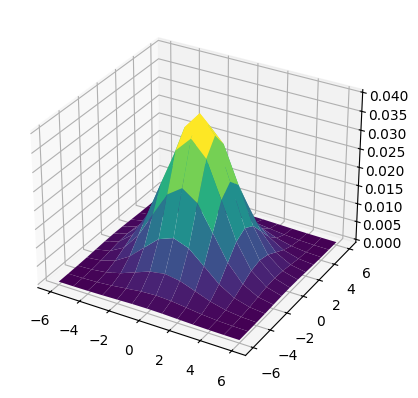

In [14]:
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, filt,cmap='viridis', edgecolor='none')


It looks nice! Now let's convolve our image with our filter. To understand better the frequencies changes, we will be using the grayscale image. High-frequency components are defined as significant pixel value changes in adjacents/close-by pixels. So let's see our output after convolving the original image with our gaussian filter

Text(0.5, 1.0, 'blurred image')

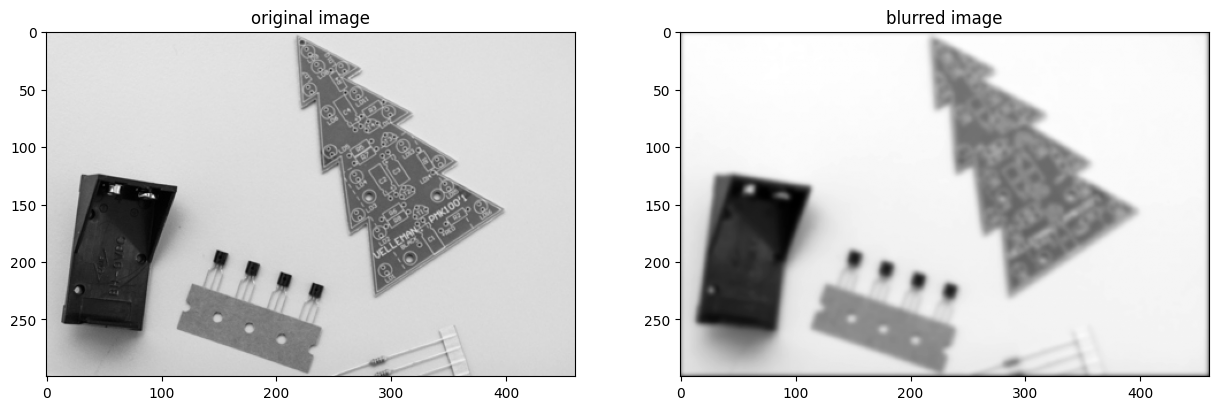

In [15]:
res = cv2.filter2D(img2,-1,filt,borderType=cv2.BORDER_CONSTANT)

fig = plt.figure(figsize=(15, 12), dpi=100)
ax = fig.add_subplot(1, 2, 1)
plt.imshow(img2,cmap="gray")
ax.set_title('original image')
ax = fig.add_subplot(1,2,2)
plt.imshow(res,cmap="gray")
ax.set_title("blurred image")

It does look much blurrier! Since high-frequency areas in images are defined as significant pixel value changes in nearby pixels, and the Gaussian filter smooths out the pixel values in an area, we effectively destroy this information from the image. We can see exactly what information are we removing by plotting the difference between the real image and the gaussian version

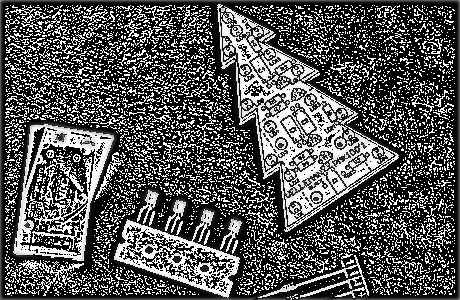

In [16]:
cv2_imshow(img2-res) # show the high frequency components in the image by subtracting our gaussian image

We can see that most of the highlighted areas comes from edges or the areas with more details in the images, which makes sense since here we are using a low-pass filter to subtract from the original image the low-frequency components, effectively keeping the high frequencies, but... is there a more direct way to do so? The answer is yes! using derivative filters

Derivative filters are high-pass filters! They extract the information on how much the neighbor pixels change with respect to the center pixel. We will use Gaussians to create a new derivative filter to extract the high-frequency components from the images.

How? just calculating the derivative of our original gaussian with respect to x and y

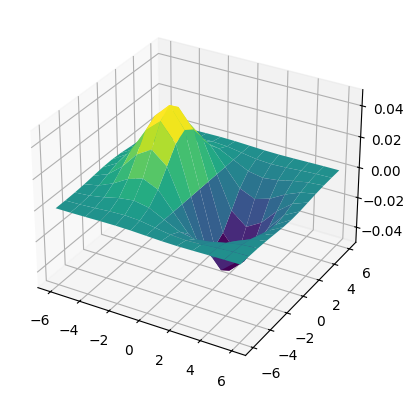

In [17]:
# we define our sigma and create the grid for our filter

sigma = 2
x, y = np.meshgrid(np.arange(np.ceil(-3*sigma),np.ceil(3*sigma+1),1), np.arange(np.ceil(-3*sigma),np.ceil(3*sigma+1),1))

# create the actual filter
filtx = -x*np.exp(-( (x**2+y**2) / ( 2.0 * sigma**2 ) ) )/(2*np.pi*sigma**2)
filty = np.transpose(filtx)

ax = plt.axes(projection='3d')

ax.plot_surface(x, y, filtx,cmap='viridis', edgecolor='none')


Now let's see how our edge detector works

Text(0.5, 1.0, 'all')

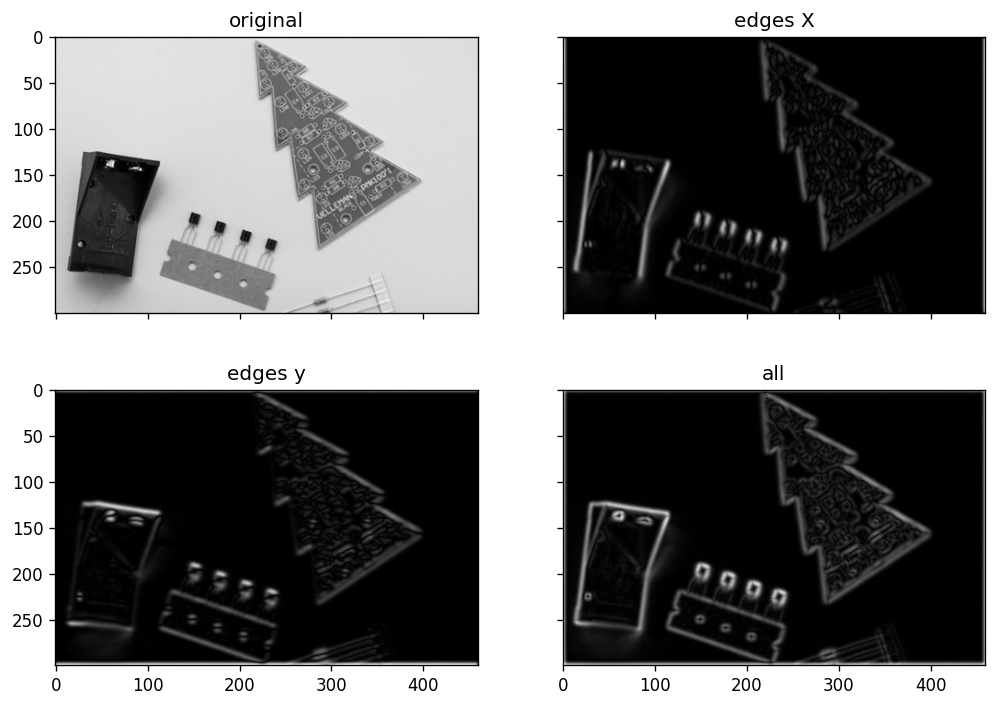

In [18]:
# since edge images can have negative values, we need to cast our image to float or int in order to keep those values
edgex = cv2.filter2D(img2.astype("float"),-1,filtx,borderType=cv2.BORDER_CONSTANT)
edgey = cv2.filter2D(img2.astype("float"),-1,filty,borderType=cv2.BORDER_CONSTANT)

# we convert the negative values to positive since they symbolize an edge but from brighter to darker areas
# Here we do not care about the type of transition on the edge but the rpesence of it
edgex=np.abs(edgex)
edgey=np.abs(edgey)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), dpi=120, sharex=True, sharey=True)
ax[0,0].imshow(img2, cmap='gray')
ax[0,0].set_title('original')

ax[0,1].imshow(edgex, cmap='gray')
ax[0,1].set_title("edges X")

ax[1,0].imshow(edgey, cmap='gray')
ax[1,0].set_title('edges y')

ax[1,1].imshow(edgex+edgey, cmap='gray')
ax[1,1].set_title("all")


The above image shows that our edge-X detector has a high response with vertical lines, meaning a significant change along the x-axis. In the figure edges y, we can see the same behavior but in this case, for horizontal lines/edges, meaning sudden change along the y axis.

The color in these figures shows the direction of the change in pixel value, from white to black (represented with white lines) and from black to white (defined as black lines), while the areas where there are no edges appear as gray.

In the final figure, we show all edges detected in the image together regardless of their direction.

we can use gaussians to also enhanced contrast, see the following example

Text(0.5, 1.0, 'original')

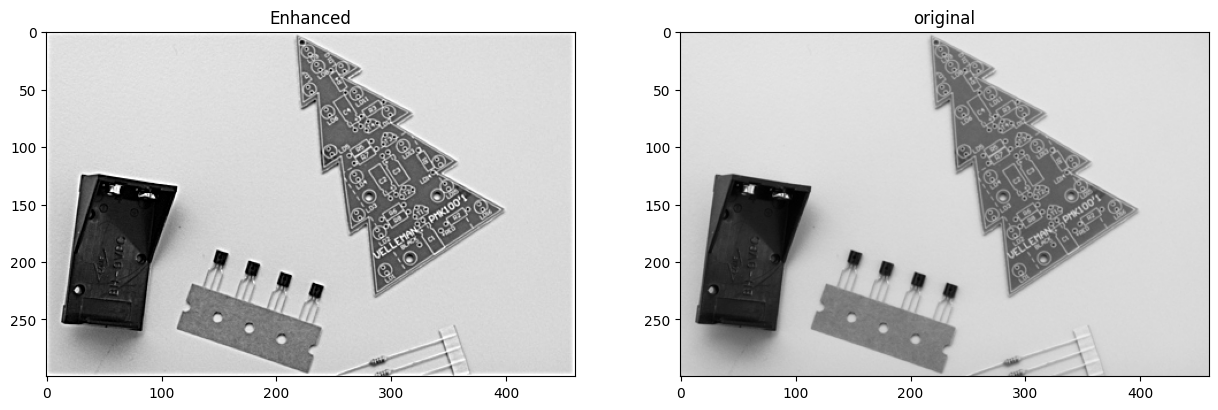

In [19]:
# analyze the next line, why does this enhance the contrast?
enhanced = np.clip(2*img2.astype("float") - res,0,255) # we need to cast our image to a bigger format to avoid overflow and then clip the values to keep them in the [0,255] range
fig = plt.figure(figsize=(15, 12), dpi=100)
ax = fig.add_subplot(1, 2, 1)
plt.imshow(enhanced,cmap="gray")
ax.set_title('Enhanced')
ax = fig.add_subplot(1,2,2)
plt.imshow(img2,cmap="gray")
ax.set_title("original")

We can clearly see that our enhanced version has a higher contrast respect to the original.

We have seen a way to enhanced contrast using a low-pass filter. Simply by multiplying the original pixel value and substracting part of the low frequency information, leaving the high frequency components untouched.



### Other commonly used filters
Finally, we can see other well-known filters such as the averaging filter, sobel operator, laplacian operator, and a contrast-enhancing filter. Please pay attention to the structure of each of these filters and their response and try to understand why they get that response.

Text(0.5, 1.0, 'Contrast enhancing')

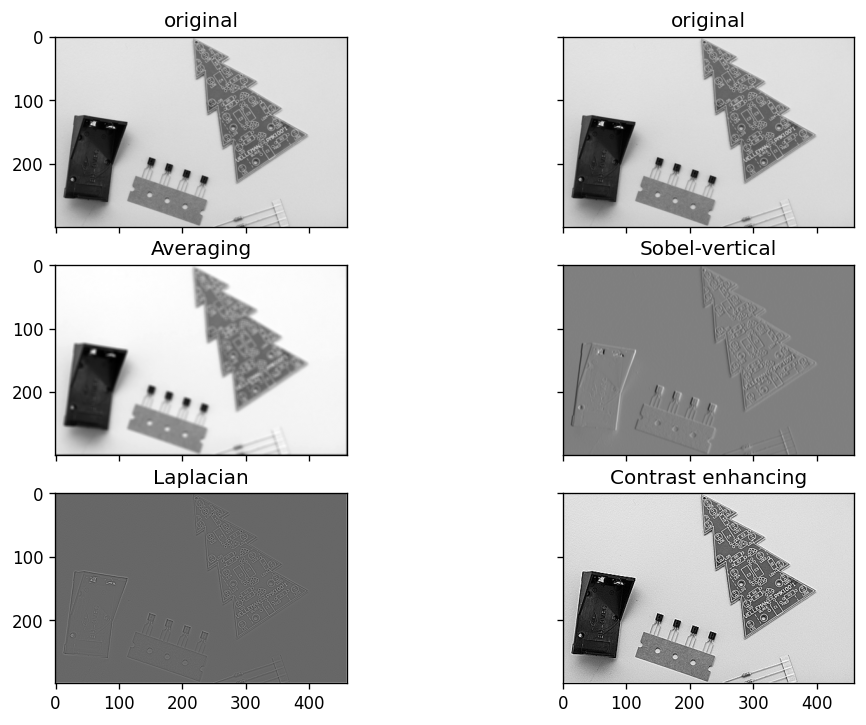

In [20]:
averaging = np.ones((5,5))/25
sobel = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
laplacian = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
contrast = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

res_averaging = cv2.filter2D(img2,-1,averaging,borderType=cv2.BORDER_CONSTANT)
res_sobel = cv2.filter2D(img2.astype("float"),-1,sobel,borderType=cv2.BORDER_CONSTANT)
res_lap = cv2.filter2D(img2.astype("float"),-1,laplacian,borderType=cv2.BORDER_CONSTANT)
res_cont = np.clip(cv2.filter2D(img2,-1,contrast,borderType=cv2.BORDER_CONSTANT),0,255)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 7), dpi=120, sharex=True, sharey=True)
ax[0,0].imshow(img2,cmap="gray")
ax[0,0].set_title('original')

ax[0,1].imshow(img2,cmap="gray")
ax[0,1].set_title('original')

ax[1,0].imshow(res_averaging,cmap="gray")
ax[1,0].set_title("Averaging")

ax[1,1].imshow(res_sobel, cmap='gray')
ax[1,1].set_title('Sobel-vertical')

ax[2,0].imshow(res_lap, cmap='gray')
ax[2,0].set_title("Laplacian")

ax[2,1].imshow(res_cont,cmap="gray")
ax[2,1].set_title("Contrast enhancing")


We can see how we obtain similar responses to our previous experiments with these filters. Each filter has its own pros and cons.

# Homework!

Use the code in the color section to segment out the X color in image Y

Implement a function that does the convolution between an image and a filter. The output of this convolution has to be of the same size as the input image. Use constant padding with value 0, and consider that the images will be in grayscale

create another function similar to the previous one that applies a median filter to the image.

Text(0.5, 1.0, 'Segmented Image')

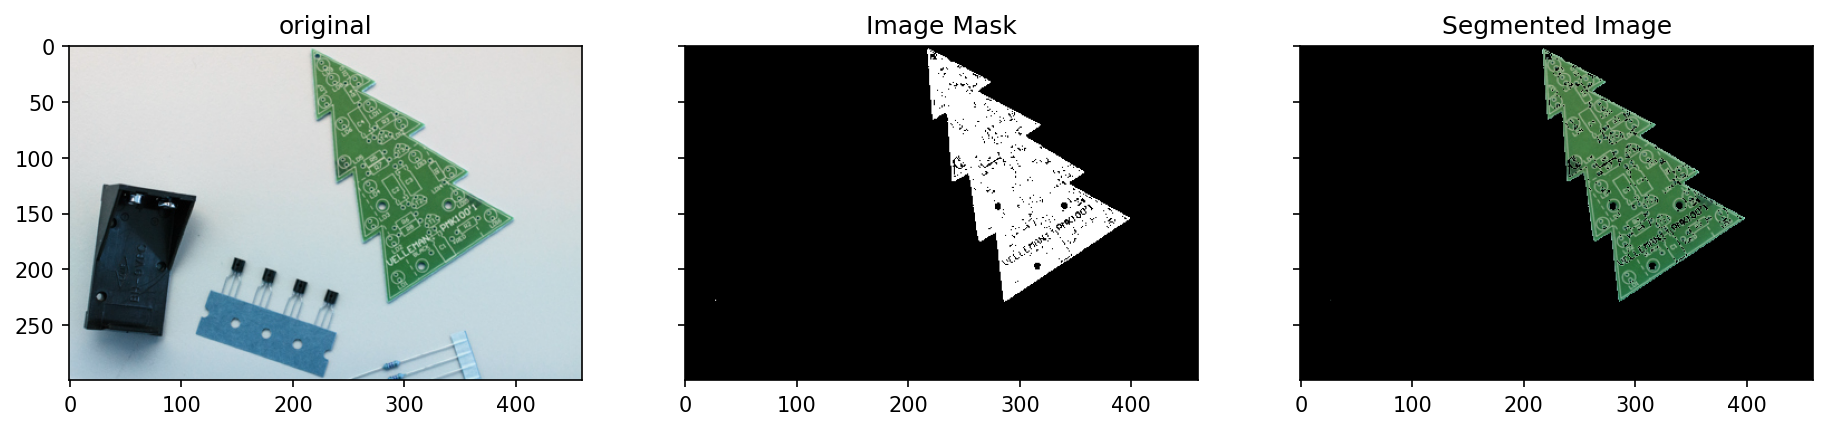

In [21]:
# Segment out all pixels with green color
# Notice that the segmentation do not need to be perfect
# Use image "placa.jpg"
# you can use most of the code from the segmentation of roses from before


img_color = cv2.imread("Lab1-CV-course-HH/placa.jpg")
# TO DO

# Transform image to HSV
img3 = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)

# Green in the range (35-75)
# Boundary for green colour range values
lower = np.array([35, 50, 50])
upper = np.array([75, 255, 255])

# Mask for pixels in the green colour range
full_mask = cv2.inRange(img3, lower, upper)

# Filter pixels in the image with the mask
img3 = cv2.bitwise_and(img3, img3, mask=full_mask)

# Show images
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), dpi=150, sharex=True, sharey=True)
ax[0].imshow(img,cmap="gray")
ax[0].set_title('original')

ax[1].imshow(full_mask,cmap="gray")
ax[1].set_title("Image Mask")

img3 = cv2.cvtColor(img3,cv2.COLOR_HSV2BGR)
ax[2].imshow(img3,cmap="gray")
ax[2].set_title("Segmented Image")



error between original and blurred with opencv filter function: 22.35777536231884
error between original and blurred with my filter function: 22.65008695652174


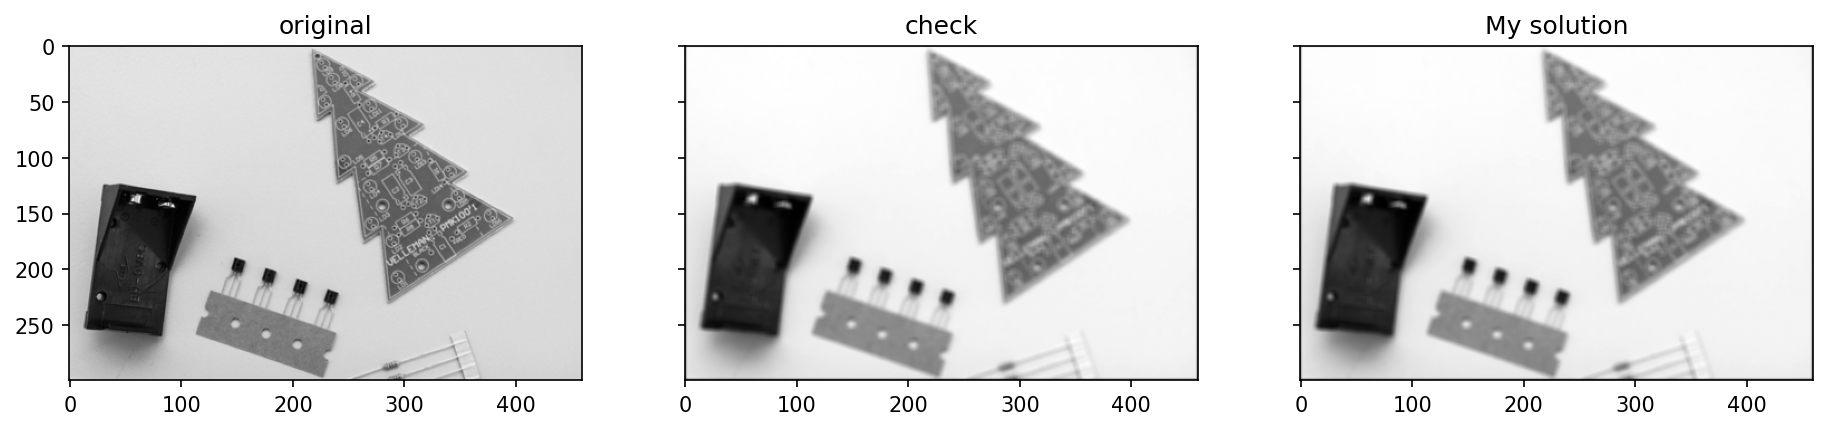

In [22]:
# my convolution function
# input images will be in black and white
# consider constant padding with value 0, you can make use of cv2.copyMakeBorder()

# NOTICE! do not just call the cv2.filter2D function, you have to develop the whole convolution function as shown in the figure at the beginning of the section "Image Filtering"
# the function receives the image and the filter to use, so no need to create the filter yourself.

def myconv(img, filt):
    # dimensions of the image and the filter
    img_h, img_w = img.shape
    filt_h, filt_w = filt.shape
    pad_h = filt_h // 2
    pad_w = filt_w // 2
    padded_img = cv2.copyMakeBorder(img, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_CONSTANT)

    output = np.zeros_like(img)

    #  convolution
    for i in range(img_h):
        for j in range(img_w):
            region = padded_img[i:i+filt_h, j:j+filt_w]
            conv_result = np.sum(region * filt)
            output[i, j] = conv_result

    return output

# you can check your results with the averaging filter

averaging = np.ones((5,5))/25
out_check = cv2.filter2D(img2,-1,averaging,borderType=cv2.BORDER_CONSTANT)

myout = myconv(img2,averaging)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), dpi=150, sharex=True, sharey=True)
ax[0].imshow(img2,cmap="gray")
ax[0].set_title('original')

ax[1].imshow(out_check,cmap="gray")
ax[1].set_title("check")

ax[2].imshow(myout,cmap="gray")
ax[2].set_title("My solution")

#L2-error
error = np.sum((img2-out_check)**2)/img2.size
error2 = np.sum((img2-myout)**2)/img2.size
print("error between original and blurred with opencv filter function: {}".format(error))
print("error between original and blurred with my filter function: {}".format(error2))

error between original and blurred with opencv filter function: 17.660760869565216
error between original and blurred with my filter function: 17.99007971014493


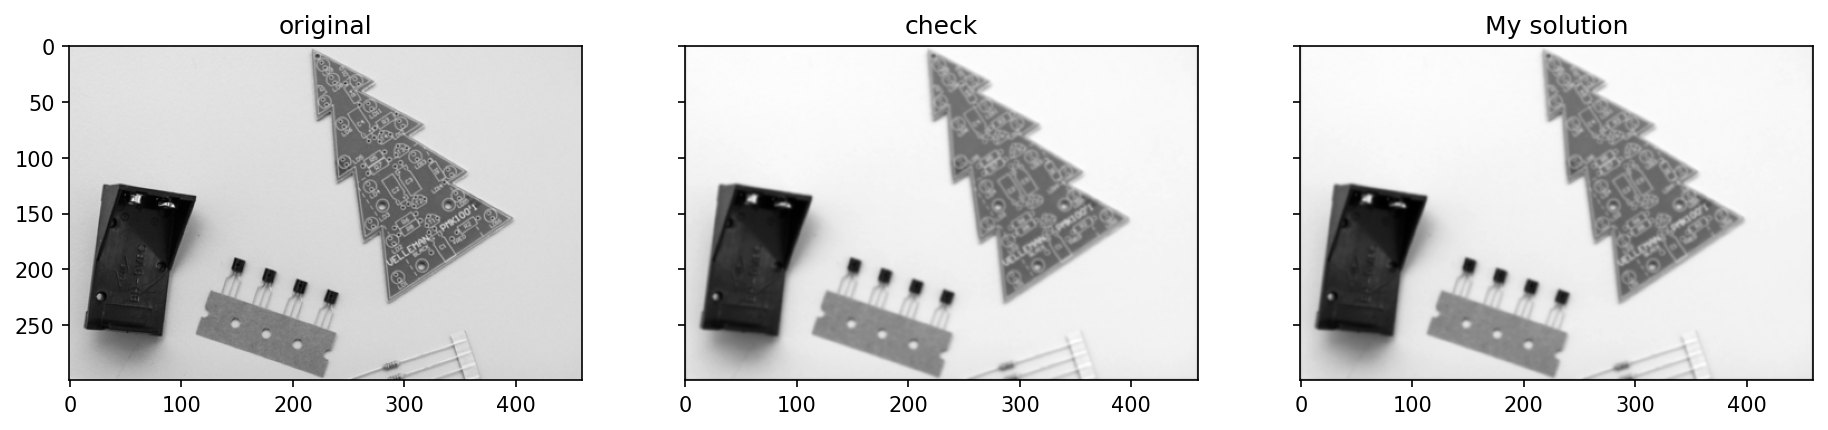

In [23]:
# Now lets check with a gaussian filter

sigma = 1 # parameter controlling the gaussian distribution and the size of the gaussian filter
x, y = np.meshgrid(np.arange(np.floor(-3*sigma),np.ceil(3*sigma+1),1), np.arange(np.ceil(-3*sigma),np.ceil(3*sigma+1),1))

# create the actual filter
gaus = (1 / (2.0 * np.pi * sigma**2.0))*np.exp(-( (x**2+y**2) / ( 2.0 * sigma**2 ) ) )


out_check = cv2.filter2D(img2,-1,gaus,borderType=cv2.BORDER_CONSTANT)

myout = myconv(img2,gaus)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), dpi=150, sharex=True, sharey=True)
ax[0].imshow(img2,cmap="gray")
ax[0].set_title('original')

ax[1].imshow(out_check,cmap="gray")
ax[1].set_title("check")

ax[2].imshow(myout,cmap="gray")
ax[2].set_title("My solution")

#L2-error
error = np.sum((img2-out_check)**2)/img2.size
error2 = np.sum((img2-myout)**2)/img2.size
print("error between original and blurred with opencv filter function: {}".format(error))
print("error between original and blurred with my filter function: {}".format(error2))

error between original clean image and solution with opencv median filter: 14.334934782608695
error between original clean image and my solution: 14.334934782608695
difference between opencv solution and mine: 0.0


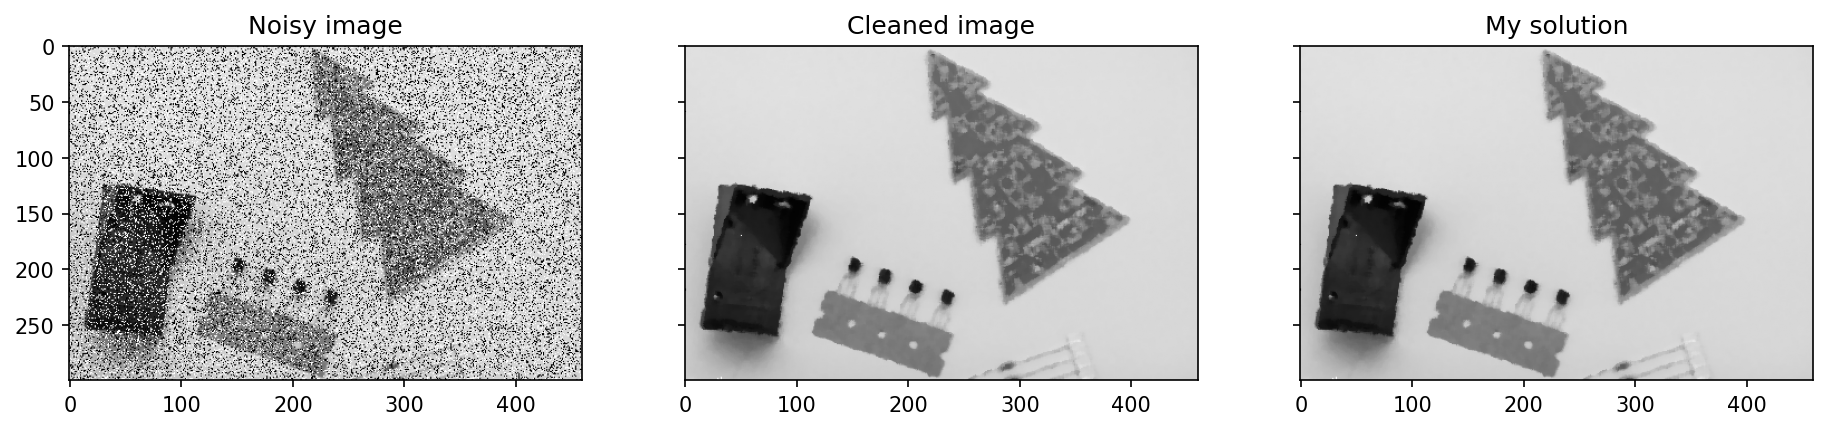

In [24]:
probnoise = 0.30
noise = np.random.rand(img2.shape[0],img2.shape[1])
black = noise <= probnoise/2
white = noise >= 1-probnoise/2

imnoise = img2.copy()
imnoise[black]=0
imnoise[white]=255

# IMPORTANT!! Update the padding function to do BORDER_REPLICATE (opencv border type, but it is the same concept as "CLAMP" in the image above about padding in this same lab file)
# in this case the function does not receive the filter since it the filter is the median operator. The parameter size represents the size of the neighborhood, in this case a neighborhood of size SizexSize pixels
# you can use the function np.median()

def medianfilter(imnoise, size):
  img_h, img_w = imnoise.shape
  pad_h = size // 2
  pad_w = size // 2
  padded_img = cv2.copyMakeBorder(imnoise, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_REPLICATE)

  output = np.zeros_like(imnoise)

  # Median filter
  for i in range(img_h):
      for j in range(img_w):
          region = padded_img[i:i+size, j:j+size]
          conv_result = np.median(region)
          output[i, j] = conv_result

  return output

filt_size = 5
cleanout = medianfilter(imnoise, filt_size)

sol_median = cv2.medianBlur(imnoise,filt_size)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), dpi=150, sharex=True, sharey=True)
ax[0].imshow(imnoise,cmap="gray")
ax[0].set_title('Noisy image')

ax[1].imshow(sol_median,cmap="gray")
ax[1].set_title("Cleaned image")

ax[2].imshow(cleanout,cmap="gray")
ax[2].set_title("My solution")

#L2-error
error = np.sum((img2-sol_median)**2)/img2.size
error_mine = np.sum((img2-cleanout)**2)/img2.size
print("error between original clean image and solution with opencv median filter: {}".format(error))
# why do you think there is still such a high error between the original image and the clean one if it looks good??
print("error between original clean image and my solution: {}".format(error_mine))
print("difference between opencv solution and mine: {}".format(np.sum((sol_median-cleanout)**2)/img2.size))

##Now repeat the process with a different range kernel/filter sizes.

###How does filter size affects blurring the images with a gaussian and averaging filter?
- A larger filter size blurs the image more. This is because a larger size filter averages more pixels, thus smoothing out the values more than a smaller filter.

###How does filter size affects the noise removal with the median filter?
- A smaller median filter size removes smaller noise and alse keeps edges and details. better because the medain considers fewer neighboring pixels. Meanwhile, a larger median filter size removes more noise but blurs edges and small details because the median is computed over a bigger area.

###Please explain the reasons of this effect based on what you have learned.
- The effect of filter size for blurring and noise removal is related to how many neighboring pixels are considered when processing each pixel. A larger filter gives a stronger effect but will keep less of the details in the image, while a smaller filter has a weaker effect but will keep more of the details of the image.

Text(0.5, 1.0, 'Large Average')

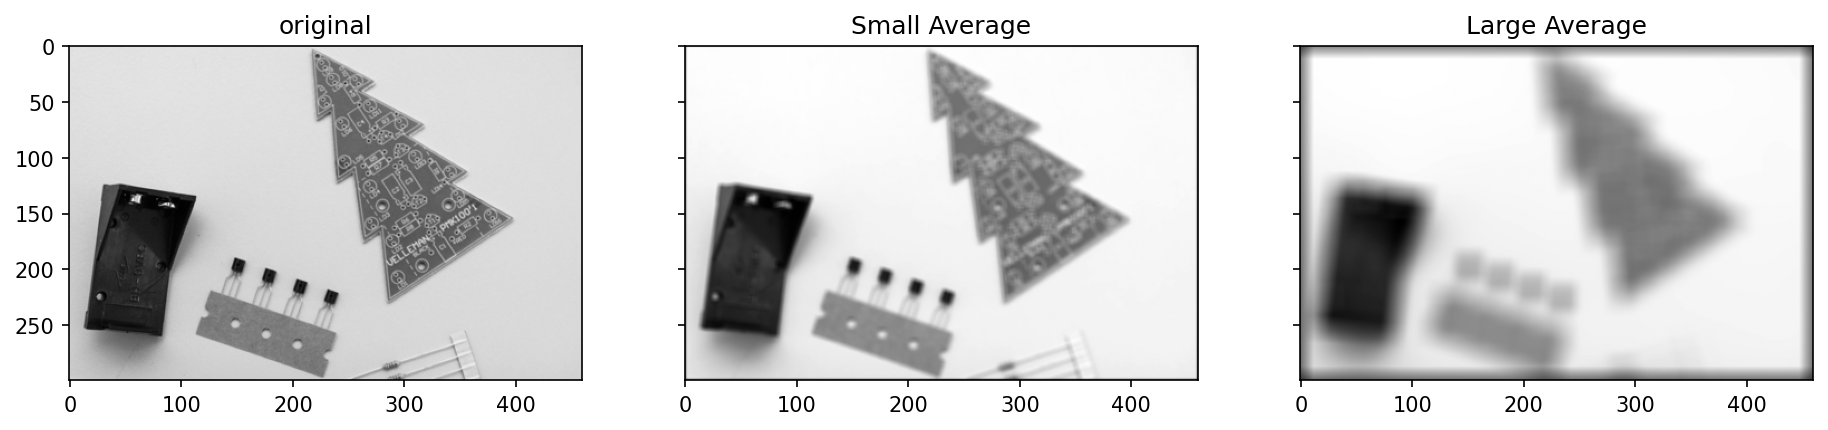

In [25]:
img = cv2.imread("Lab1-CV-course-HH/placa.jpg")
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


averaging_small = np.ones((5,5))/25
averaging_large = np.ones((25,25))/625

myout_small_average = myconv(img2, averaging_small)
myout_large_average = myconv(img2, averaging_large)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), dpi=150, sharex=True, sharey=True)
ax[0].imshow(img2,cmap="gray")
ax[0].set_title('original')

ax[1].imshow(myout_small_average,cmap="gray")
ax[1].set_title("Small Average")

ax[2].imshow(myout_large_average,cmap="gray")
ax[2].set_title("Large Average")

Text(0.5, 1.0, 'Large Cleanout')

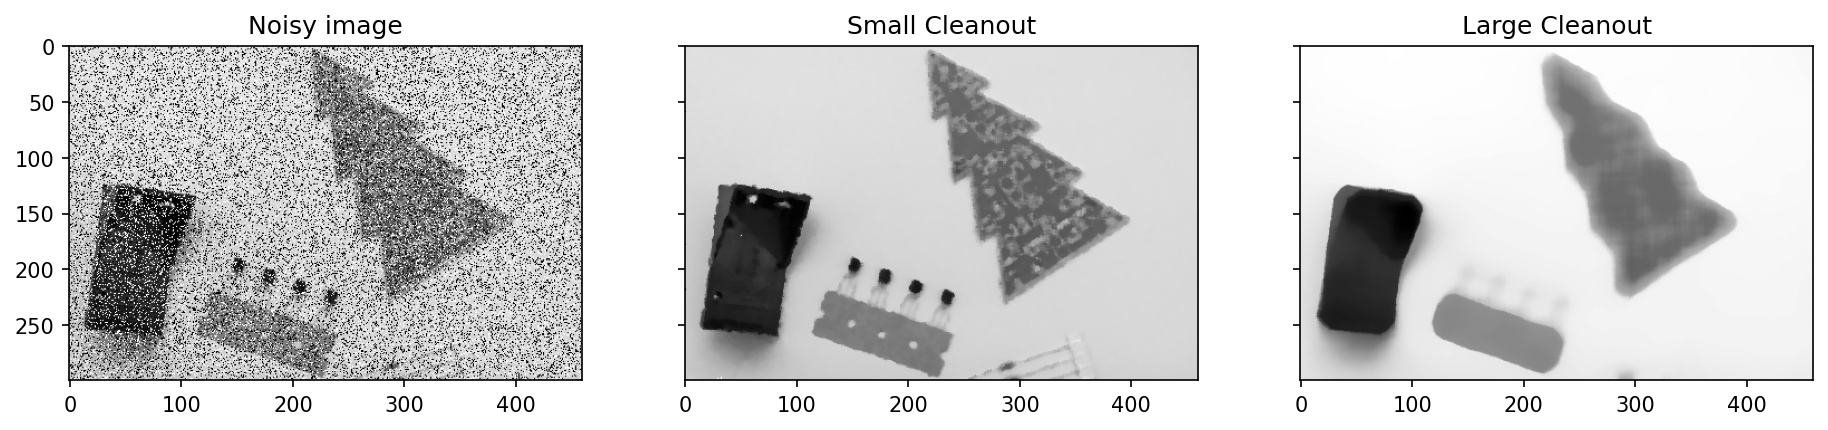

In [26]:
small_filt_size = 5
large_filt_size = 25
small_cleanout = medianfilter(imnoise, small_filt_size)
large_cleanout = medianfilter(imnoise, large_filt_size)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), dpi=150, sharex=True, sharey=True)
ax[0].imshow(imnoise,cmap="gray")
ax[0].set_title('Noisy image')

ax[1].imshow(small_cleanout,cmap="gray")
ax[1].set_title("Small Cleanout")

ax[2].imshow(large_cleanout,cmap="gray")
ax[2].set_title("Large Cleanout")

# Submission
Once you have finished the tasks, go to "runtime" -> "restart and run all",  download the jupyter notebook by going to File -> download -> download .ipynb and submit the file to blackboard